In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import math
import seaborn as sns

In [3]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

In [4]:
train.select_dtypes('object').columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1', 'Segmentation'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     8068 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        8068 non-null   object 
 5   Profession       8068 non-null   object 
 6   Work_Experience  8068 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      8068 non-null   float64
 9   Var_1            8068 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
cat_var = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']

In [7]:
num_var = ['Age','Work_Experience','Family_Size']

In [8]:
train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

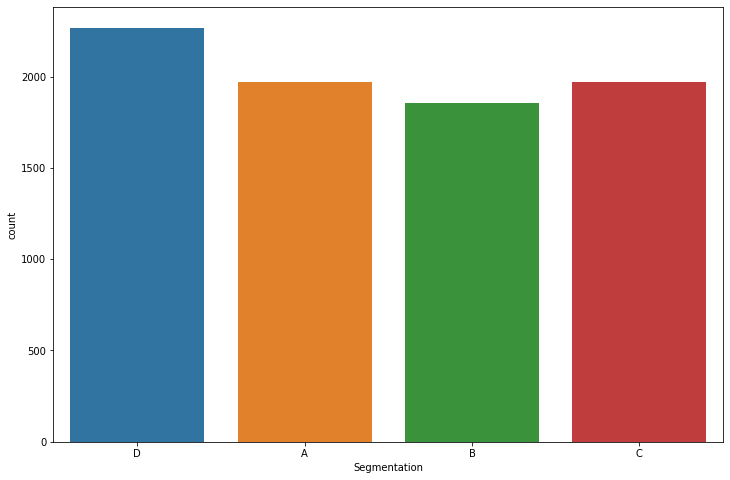

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(train['Segmentation'])
plt.show()

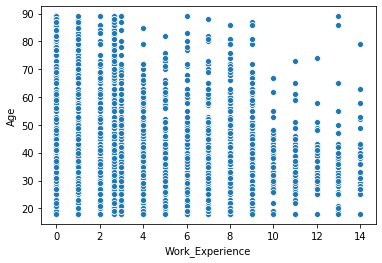

In [10]:
sns.scatterplot(x = 'Work_Experience',y='Age',data = train)

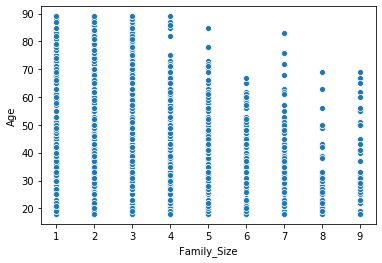

In [11]:
sns.scatterplot(x = 'Family_Size',y='Age',data = train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B48E64048>,
      dtype=object)

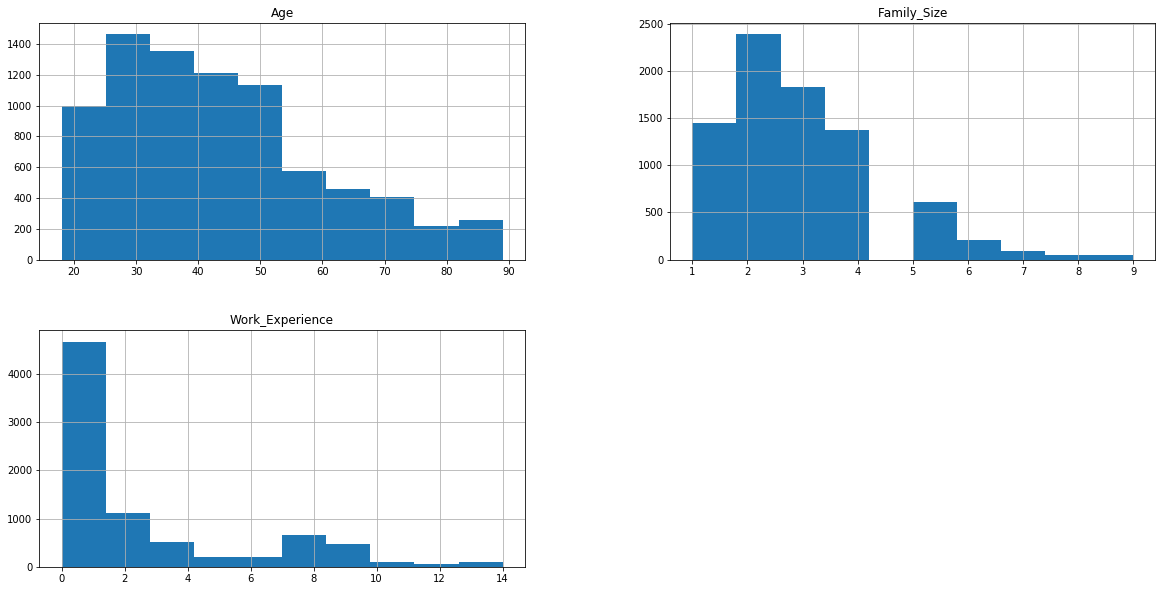

In [12]:
train[num_var].hist(figsize =(20,10))

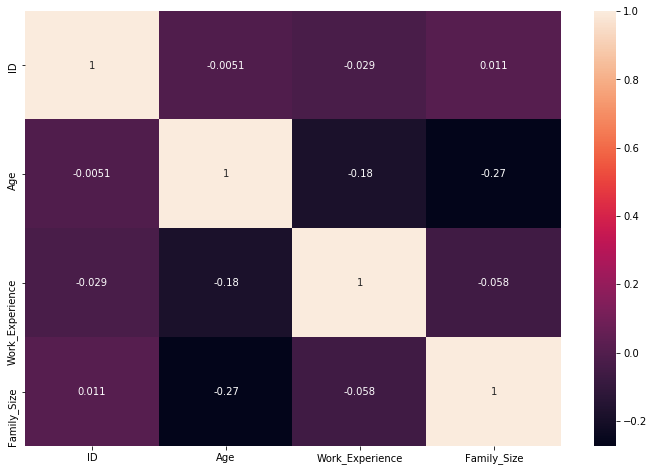

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(train.corr(),annot = True)
plt.show()


# Get Dummies for categorical data

In [14]:
# Train data
dummies = pd.get_dummies(data = train[cat_var])
train = pd.concat([train,dummies],axis = 1)
train.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1'],axis = 1,inplace = True)

# Test data
dummies_test = pd.get_dummies(data = test[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1']])
test = pd.concat([test,dummies_test],axis = 1)
test.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score','Var_1'],axis = 1,inplace = True)

# Scaling the numeric variables

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = scaler.fit_transform(pd.DataFrame(df[col]))
    return df

In [18]:
train = scaleColumns(train,num_var)

test = scaleColumns(test,num_var)

In [19]:
train.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0.056338,0.071429,0.375,D,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,462643,0.281690,0.188690,0.250,A,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,0.690141,0.071429,0.000,B,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,0.690141,0.000000,0.125,B,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,0.309859,0.188690,0.625,A,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Label encoding target variable

In [1]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
train['Segmentation'] = le.fit_transform(train['Segmentation'])

In [21]:
train.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0.056338,0.071429,0.375,3,0,1,1,0,1,...,0,0,1,0,0,0,1,0,0,0
1,462643,0.281690,0.188690,0.250,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,466315,0.690141,0.071429,0.000,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,0.690141,0.000000,0.125,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,462669,0.309859,0.188690,0.625,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
target =['Segmentation']
IDcol = ['ID']

features = [x for x in train.columns if x not in target+IDcol]

In [24]:
X = train[features].values
y= train[target].values

In [25]:
X.shape,y.shape

((8068, 28), (8068, 1))

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify =y)

In [27]:
X_train.shape,X_test.shape

((6454, 28), (1614, 28))

# KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# WE will check the accuracy scores for train and test for different neighbours and decide which k should be used for final model

from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
C:\U

In [30]:
max_train_score = max(train_scores)
max_test_score = max(test_scores)

In [31]:
for i, v in enumerate(train_scores):
    if v == max_train_score:
        train_ind = i+1

In [36]:
train_ind,max_train_score

(1, 0.9601797334986055)

In [33]:
for i, v in enumerate(test_scores):
    if v == max_test_score:
        test_ind = i+1

In [37]:
test_ind,max_test_score

(14, 0.5092936802973977)

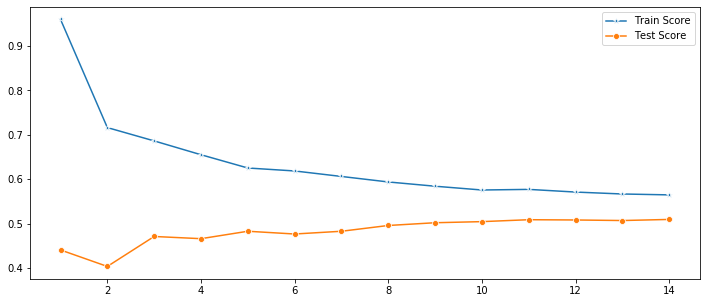

In [54]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

# K-means

In [38]:
from sklearn.cluster import KMeans

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [48]:

# Fit the input data. Create labels and get inertia
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X_train)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [50]:
cm = confusion_matrix(y_train,labels)

In [51]:
print(cm)

[[575 360 455 188]
 [627 475 278 106]
 [697 562 187 130]
 [350 180 442 842]]


In [52]:
print(classification_report(y_train,labels))

              precision    recall  f1-score   support

           0       0.26      0.36      0.30      1578
           1       0.30      0.32      0.31      1486
           2       0.14      0.12      0.13      1576
           3       0.67      0.46      0.55      1814

    accuracy                           0.32      6454
   macro avg       0.34      0.32      0.32      6454
weighted avg       0.35      0.32      0.33      6454



### We can see the accuracy is very low for K-Means, so we will use KNN algorithm for final model

# Final Model

In [55]:
# k =14
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.5092936802973977

## Confusion Matrix

In [59]:
y_pred = knn.predict(X_test)

In [63]:
print("Confsion Matrix")
print(confusion_matrix(y_test,y_pred))

Confsion Matrix
[[162  92  59  81]
 [111 116 107  38]
 [ 49  72 221  52]
 [ 99  22  10 323]]


In [64]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.38      0.41      0.40       394
           1       0.38      0.31      0.34       372
           2       0.56      0.56      0.56       394
           3       0.65      0.71      0.68       454

    accuracy                           0.51      1614
   macro avg       0.49      0.50      0.50      1614
weighted avg       0.50      0.51      0.50      1614



## Accuracy = 51%

# Prediction on test data

In [69]:
test['Segmentation'] = knn.predict(test[features])

In [70]:
test.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,458989,0.253521,0.000000,0.000,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
1,458994,0.267606,0.571429,0.375,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,2
2,458996,0.718310,0.000000,0.000,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,2
3,459000,0.577465,0.785714,0.125,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,2
4,459001,0.014085,0.182328,0.375,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,3


In [73]:
test['Segmentation'] = test['Segmentation'].apply(str)

In [75]:
mapping ={'0':'A','1':'B','2':'C','3':'D'}

In [77]:
test['Segmentation'] = test['Segmentation'].replace({'0':'A','1':'B','2':'C','3':'D'})

In [78]:
test.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation
0,458989,0.253521,0.000000,0.000,1,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,B
1,458994,0.267606,0.571429,0.375,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,C
2,458996,0.718310,0.000000,0.000,1,0,0,1,1,0,...,0,1,0,0,0,0,0,1,0,C
3,459000,0.577465,0.785714,0.125,0,1,0,1,1,0,...,1,0,0,0,0,0,0,1,0,C
4,459001,0.014085,0.182328,0.375,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,D


In [79]:
submission = test[['ID','Segmentation']]

In [80]:
submission.to_csv("Submission.csv",index = False)